# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
# Reading in the dataset
wine = pd.read_csv('wine.csv')
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [34]:
#recalibrate our predictor
#do this once
#wine['quality']=wine['quality'].map(lambda x:x-3)

In [35]:
# Defining X and y
X = wine.drop('quality',axis=1)

y= wine['quality']


In [36]:
wine.quality.value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

In [10]:
# Investigating our target



In [50]:
# Splitting and scaling

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [51]:
y_train[:2]

1539    2
1109    3
Name: quality, dtype: int64

In [54]:
# Encoding our target
#y_train =  to_categorical(y_train)
#y_test = to_categorical(y_test)


In [53]:
y_train.shape

(4872, 7)

In [72]:
# Constructing our model
model = Sequential()
n_input = X_train_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden,input_dim=n_input,activation='relu'))
# We want to predict probabilities, so we'll use a softmax activation

model.add(Dense(7,activation='softmax'))


In [73]:
# Compiling

# We want to use categorical crossentropy as our optimizer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']
             )


In [74]:
# Fitting and saving the history log

history_log = model.fit(X_train_s,y_train,
                        validation_data=(X_test_s,y_test),
                       epochs=42, batch_size=None)


Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 256us/step - loss: 1.7685 - acc: 0.2982 - val_loss: 1.5161 - val_acc: 0.4609
Epoch 2/42
4872/4872 [==============================] - 1s 139us/step - loss: 1.3847 - acc: 0.4657 - val_loss: 1.3034 - val_acc: 0.4825
Epoch 3/42
4872/4872 [==============================] - 1s 139us/step - loss: 1.2343 - acc: 0.4891 - val_loss: 1.2166 - val_acc: 0.4948
Epoch 4/42
4872/4872 [==============================] - 1s 130us/step - loss: 1.1672 - acc: 0.5060 - val_loss: 1.1756 - val_acc: 0.5028
Epoch 5/42
4872/4872 [==============================] - 0s 98us/step - loss: 1.1325 - acc: 0.5220 - val_loss: 1.1517 - val_acc: 0.5095
Epoch 6/42
4872/4872 [==============================] - 1s 140us/step - loss: 1.1113 - acc: 0.5343 - val_loss: 1.1365 - val_acc: 0.5138
Epoch 7/42
4872/4872 [==============================] - 1s 274us/step - loss: 1.0982 - acc: 0.5431 - val_loss: 1.1288 - val_acc: 0.5151
E

In [58]:
# Extracting weights

for layer in model.layers:
    print(layer.get_weights())

[array([[-0.1463805 , -0.72063047, -0.01442604, -0.3665842 , -0.12239297,
         0.27641115, -0.01904706, -0.11934267, -0.04579281,  0.33907774,
        -0.4292147 ,  0.42038652],
       [-0.52109736,  0.374604  , -0.20766333,  0.17855789,  0.39676613,
        -0.33452013, -0.8564925 ,  0.57255536,  0.07936831,  0.05153576,
        -0.5729576 ,  0.19242595],
       [-0.38080466, -0.06823654,  0.3733662 , -0.17853843,  0.4327863 ,
         0.1479583 , -0.29405454, -0.07701122, -0.23973604, -0.3361478 ,
        -0.22536911, -0.08059634],
       [-0.22729671,  0.4160246 , -0.13904674,  0.14683194, -0.31790432,
         0.0370829 ,  0.43369517,  0.18857673, -0.8011361 , -0.5000155 ,
         0.55946285,  0.49636906],
       [-0.15699494,  0.10251114,  0.13927333,  0.2163994 , -0.29991212,
        -0.5888271 ,  0.11348782, -0.4278596 ,  0.23750144, -0.18876399,
        -0.48065373,  0.33159688],
       [-0.21856417, -0.16661237,  0.20276545,  0.41361254,  0.15545522,
         0.34803772, 

In [59]:
# Predicting on some test data
model.predict(X_test_s[:5]).round(2)


array([[0.  , 0.  , 0.02, 0.63, 0.3 , 0.05, 0.  ],
       [0.01, 0.02, 0.85, 0.12, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.36, 0.44, 0.15, 0.01],
       [0.  , 0.01, 0.53, 0.4 , 0.04, 0.01, 0.  ],
       [0.  , 0.01, 0.67, 0.27, 0.04, 0.01, 0.  ]], dtype=float32)

In [60]:
# Comparing with reality

y_test[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

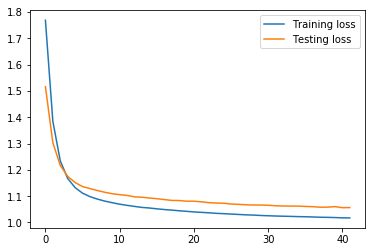

In [75]:
# Plotting
plt.plot(history_log.history['loss'], label='Training loss')
plt.plot(history_log.history['val_loss'], label='Testing loss')
plt.legend();

## Adding Regularization

In [67]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(7, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 147us/step - loss: 1.7918 - acc: 0.3918 - val_loss: 1.5640 - val_acc: 0.4769
Epoch 2/42
4872/4872 [==============================] - 0s 86us/step - loss: 1.4811 - acc: 0.4901 - val_loss: 1.4109 - val_acc: 0.5003
Epoch 3/42
4872/4872 [==============================] - 0s 78us/step - loss: 1.3769 - acc: 0.5096 - val_loss: 1.3460 - val_acc: 0.5138
Epoch 4/42
4872/4872 [==============================] - 0s 85us/step - loss: 1.3203 - acc: 0.5265 - val_loss: 1.3042 - val_acc: 0.5212
Epoch 5/42
4872/4872 [==============================] - 0s 91us/step - loss: 1.2816 - acc: 0.5365 - val_loss: 1.2756 - val_acc: 0.5323
Epoch 6/42
4872/4872 [==============================] - 0s 87us/step - loss: 1.2537 - acc: 0.5431 - val_loss: 1.2542 - val_acc: 0.5305
Epoch 7/42
4872/4872 [==============================] - 0s 89us/step - loss: 1.2321 - acc: 0.5443 - val_loss: 1.2382 - val_acc: 0.5305
Epoch 

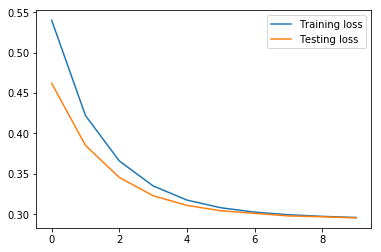

In [64]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [78]:
from keras.layers import Dropout

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2))
model_d.add(Dense(7, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 227us/step - loss: 2.0208 - acc: 0.1593 - val_loss: 1.6507 - val_acc: 0.3458
Epoch 2/42
4872/4872 [==============================] - 1s 111us/step - loss: 1.5545 - acc: 0.4033 - val_loss: 1.3989 - val_acc: 0.4726
Epoch 3/42
4872/4872 [==============================] - 1s 110us/step - loss: 1.3798 - acc: 0.4518 - val_loss: 1.2790 - val_acc: 0.4923
Epoch 4/42
4872/4872 [==============================] - 1s 111us/step - loss: 1.2912 - acc: 0.4692 - val_loss: 1.2192 - val_acc: 0.5089
Epoch 5/42
4872/4872 [==============================] - 1s 159us/step - loss: 1.2430 - acc: 0.4840 - val_loss: 1.1859 - val_acc: 0.5169
Epoch 6/42
4872/4872 [==============================] - 1s 108us/step - loss: 1.2043 - acc: 0.4955 - val_loss: 1.1619 - val_acc: 0.5231
Epoch 7/42
4872/4872 [==============================] - 1s 121us/step - loss: 1.1826 - acc: 0.5144 - val_loss: 1.1454 - val_acc: 0.5249


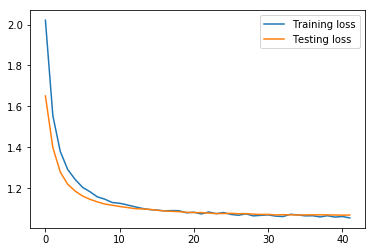

In [79]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [80]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.5496715927750411, 0.5439999997799213)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [81]:
from keras.callbacks import EarlyStopping

In [91]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(7, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                         epochs=42, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 191us/step - loss: 1.8983 - acc: 0.2576 - val_loss: 1.5659 - val_acc: 0.4142
Epoch 2/42
4872/4872 [==============================] - 0s 89us/step - loss: 1.4403 - acc: 0.4696 - val_loss: 1.3280 - val_acc: 0.4966
Epoch 3/42
4872/4872 [==============================] - 1s 210us/step - loss: 1.2779 - acc: 0.4951 - val_loss: 1.2344 - val_acc: 0.5083
Epoch 4/42
4872/4872 [==============================] - 1s 110us/step - loss: 1.2046 - acc: 0.5113 - val_loss: 1.1897 - val_acc: 0.5151
Epoch 5/42
4872/4872 [==============================] - 1s 108us/step - loss: 1.1631 - acc: 0.5213 - val_loss: 1.1656 - val_acc: 0.5212
Epoch 6/42
4872/4872 [==============================] - 0s 98us/step - loss: 1.1360 - acc: 0.5285 - val_loss: 1.1470 - val_acc: 0.5231
Epoch 7/42
4872/4872 [==============================] - 0s 92us/step - loss: 1.1166 - acc: 0.5361 - val_loss: 1.1339 - val_acc: 0.5298
Epo

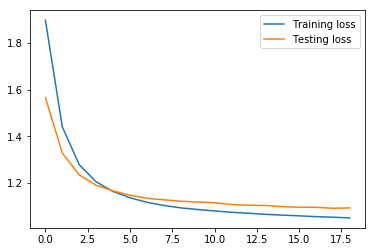

In [92]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();